<a href="https://colab.research.google.com/github/HitanshKhosla/Dog-vs-Cat-Image-Classfication/blob/main/Dog_vs_Cat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [3]:
#configuring kaggle json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:29<00:00, 23.4MB/s]
100% 812M/812M [00:29<00:00, 28.5MB/s]


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [6]:
from zipfile import ZipFile
dataset='/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print(zip.namelist())

['sampleSubmission.csv', 'test1.zip', 'train.zip']


In [7]:
dataset='/content/train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print(zip.namelist())

['train/', 'train/cat.0.jpg', 'train/cat.1.jpg', 'train/cat.10.jpg', 'train/cat.100.jpg', 'train/cat.1000.jpg', 'train/cat.10000.jpg', 'train/cat.10001.jpg', 'train/cat.10002.jpg', 'train/cat.10003.jpg', 'train/cat.10004.jpg', 'train/cat.10005.jpg', 'train/cat.10006.jpg', 'train/cat.10007.jpg', 'train/cat.10008.jpg', 'train/cat.10009.jpg', 'train/cat.1001.jpg', 'train/cat.10010.jpg', 'train/cat.10011.jpg', 'train/cat.10012.jpg', 'train/cat.10013.jpg', 'train/cat.10014.jpg', 'train/cat.10015.jpg', 'train/cat.10016.jpg', 'train/cat.10017.jpg', 'train/cat.10018.jpg', 'train/cat.10019.jpg', 'train/cat.1002.jpg', 'train/cat.10020.jpg', 'train/cat.10021.jpg', 'train/cat.10022.jpg', 'train/cat.10023.jpg', 'train/cat.10024.jpg', 'train/cat.10025.jpg', 'train/cat.10026.jpg', 'train/cat.10027.jpg', 'train/cat.10028.jpg', 'train/cat.10029.jpg', 'train/cat.1003.jpg', 'train/cat.10030.jpg', 'train/cat.10031.jpg', 'train/cat.10032.jpg', 'train/cat.10033.jpg', 'train/cat.10034.jpg', 'train/cat.10035.

In [8]:
import os
path, dirs, files=next(os.walk('/content/train'))
file_count=len(files)
print(file_count)

25000


In [9]:
file_names=os.listdir('/content/train')
print(file_names)

['dog.3325.jpg', 'dog.1242.jpg', 'cat.2360.jpg', 'cat.3058.jpg', 'dog.4162.jpg', 'cat.7101.jpg', 'dog.3183.jpg', 'dog.7261.jpg', 'dog.11287.jpg', 'cat.8205.jpg', 'cat.74.jpg', 'cat.3214.jpg', 'cat.4491.jpg', 'dog.2577.jpg', 'dog.960.jpg', 'dog.7775.jpg', 'cat.779.jpg', 'cat.7525.jpg', 'dog.1236.jpg', 'cat.10885.jpg', 'dog.4154.jpg', 'dog.9701.jpg', 'dog.3667.jpg', 'dog.6803.jpg', 'cat.7996.jpg', 'cat.104.jpg', 'cat.10146.jpg', 'dog.7601.jpg', 'dog.8709.jpg', 'cat.4145.jpg', 'dog.1894.jpg', 'cat.8238.jpg', 'cat.4427.jpg', 'cat.10838.jpg', 'dog.4076.jpg', 'dog.9588.jpg', 'cat.10900.jpg', 'dog.1247.jpg', 'cat.11294.jpg', 'cat.8165.jpg', 'cat.7898.jpg', 'dog.8664.jpg', 'dog.10560.jpg', 'cat.8422.jpg', 'dog.3857.jpg', 'cat.6365.jpg', 'dog.11397.jpg', 'dog.3080.jpg', 'cat.6367.jpg', 'dog.2619.jpg', 'cat.2689.jpg', 'dog.6388.jpg', 'cat.3532.jpg', 'dog.1099.jpg', 'dog.941.jpg', 'dog.11563.jpg', 'dog.7041.jpg', 'dog.50.jpg', 'dog.6440.jpg', 'cat.10443.jpg', 'cat.9736.jpg', 'dog.4760.jpg', 'cat.

Importing the Dependencies


In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [11]:
img=mpimg.imread('/content/train/dog.6169.jpg')
img.shape

(459, 499, 3)

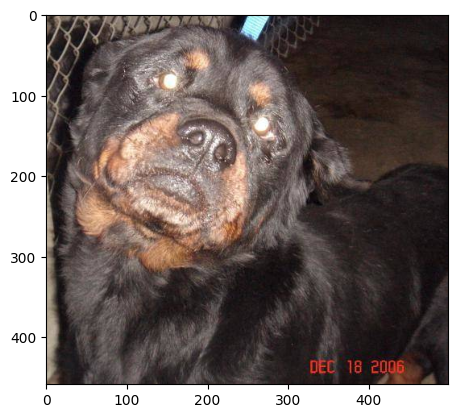

In [12]:
plt.imshow(img)

(459, 499, 3)

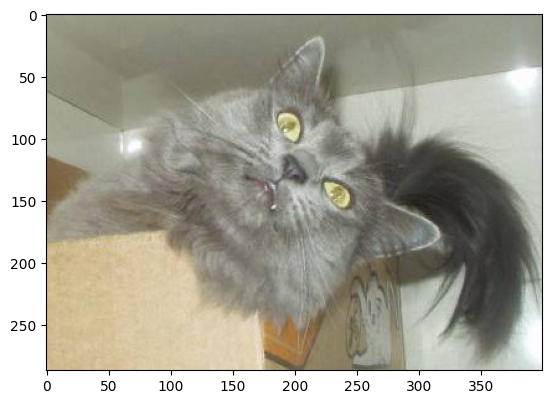

In [13]:
imp1=mpimg.imread('/content/train/cat.1169.jpg')
plt.imshow(imp1)
img.shape

In [14]:
file_names=os.listdir('/content/train')

dog_count=0
cat_count=0

for img in file_names:

  name=img[0:3]
  if name=='dog':
    dog_count=dog_count+1
  else:
    cat_count=cat_count+1

print('The no of dogs in the given dataset',dog_count)
print('The no oof cats in the given dataset',cat_count)

The no of dogs in the given dataset 12500
The no oof cats in the given dataset 12500


In [15]:
os.mkdir('/content/resized_images')

In [16]:
orignal_folder='/content/train/'
resized_folder='/content/resized_images/'

for i in range(2000):
  filename=os.listdir(orignal_folder)[i]
  img_path=orignal_folder+filename
  img=Image.open(img_path)
  img=img.resize((224,224))
  newpath=resized_folder+filename
  img.save(newpath)


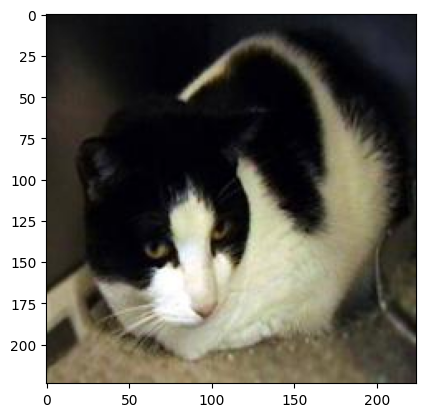

In [17]:
img_new=mpimg.imread('/content/resized_images/cat.10069.jpg')
plt.imshow(img_new)

In [18]:
file_name=os.listdir('/content/resized_images')
list=[]
for i in range(2000):
  img=file_name[i]
  name=img[0:3]
  if name=='dog':
    list.append(1)
  else:
    list.append(0)


In [19]:
list

[1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,


In [20]:
values,count=np.unique(list,return_counts=True)
print(values)
print(count)

[0 1]
[ 974 1026]


In [21]:
import cv2
import glob
import numpy as np

# Define the path and extensions
image_path = '/content/resized_images/'
image_extensions = ['png', 'jpg']

# Create an empty list to hold file paths
files = []

# Extend the files list with paths matching the image extensions
for ext in image_extensions:
    files.extend(glob.glob(image_path + '*.' + ext))

# Read images into a list
images = np.asarray([cv2.imread(file) for file in files])

# Convert the list of images to a NumPy array
dog_cat_images = np.array(images)

print(dog_cat_images.shape)  # Print the shape to verify the result


(2000, 224, 224, 3)


In [22]:
print(dog_cat_images)

[[[[139 142 147]
   [140 143 148]
   [138 141 146]
   ...
   [164 163 179]
   [162 162 178]
   [161 161 177]]

  [[139 142 147]
   [140 143 148]
   [138 141 146]
   ...
   [176 175 191]
   [173 172 188]
   [171 171 187]]

  [[139 142 147]
   [141 144 149]
   [140 143 148]
   ...
   [180 177 193]
   [177 174 190]
   [173 172 188]]

  ...

  [[138 141 146]
   [139 142 147]
   [157 160 165]
   ...
   [ 84  86  94]
   [ 87  89  97]
   [ 85  87  95]]

  [[105 108 113]
   [112 115 120]
   [142 145 150]
   ...
   [ 78  81  89]
   [ 84  87  95]
   [ 85  88  96]]

  [[ 94  97 102]
   [108 111 116]
   [149 152 157]
   ...
   [ 73  76  84]
   [ 82  85  93]
   [ 86  89  97]]]


 [[[125 134 143]
   [124 133 142]
   [123 132 141]
   ...
   [123 134 138]
   [121 132 136]
   [119 130 134]]

  [[136 145 154]
   [131 140 149]
   [126 135 144]
   ...
   [127 138 142]
   [126 135 139]
   [121 132 136]]

  [[139 148 157]
   [132 141 150]
   [126 135 144]
   ...
   [123 132 136]
   [121 127 132]
   [116 125

In [23]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [24]:
X=dog_cat_images
Y=np.asarray(list)

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [26]:
X_train.shape

(1600, 224, 224, 3)

Standardization


In [36]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [27]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

In [28]:
mobilenet_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrainedmodel=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [29]:
import tf_keras
model=tf_keras.Sequential([
    pretrainedmodel,
    tf_keras.layers.Dense(2,name='layer1')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 layer1 (Dense)              (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [30]:
model.compile(loss=tf_keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=tf_keras.optimizers.Adam(),metrics=['accuracy'])

In [37]:
model.fit(X_train_scaled,Y_train,epochs=5,verbose=1)

Epoch 1/5
50/50 [==============================] - 64s 1s/step - loss: 0.2113 - accuracy: 0.9094
Epoch 2/5
50/50 [==============================] - 58s 1s/step - loss: 0.0723 - accuracy: 0.9756
Epoch 3/5
50/50 [==============================] - 68s 1s/step - loss: 0.0552 - accuracy: 0.9825
Epoch 4/5
50/50 [==============================] - 83s 2s/step - loss: 0.0441 - accuracy: 0.9856
Epoch 5/5
50/50 [==============================] - 62s 1s/step - loss: 0.0374 - accuracy: 0.9881


In [39]:
loss, accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test accuracy',accuracy)
print('Loss',loss)

13/13 [==============================] - 35s 3s/step - loss: 0.0697 - accuracy: 0.9725
Test accuracy 0.9725000262260437
Loss 0.06965889781713486


/content/images.jpg


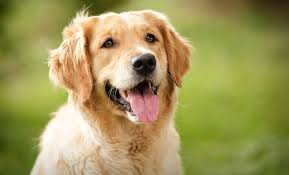

1/1 [==============================] - 1s 633ms/step
The image is a dog


In [40]:
input_image=input()
input_image=cv2.imread(input_image)
cv2_imshow(input_image)
resized_image=cv2.resize(input_image,(224,224))
scaled_image=resized_image/255
image_reshaped=np.reshape(scaled_image,(1,224,224,3))
prediction=model.predict(image_reshaped)
if np.argmax(prediction)==0:
  print('The image is a cat')
else:
  print('The image is a dog')
